#### Input

In [1]:
%load_ext autoreload
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpplots as plothelp
import helpfunction as helper
import pickle

<IPython.core.display.Javascript object>

In [3]:
%autoreload

<IPython.core.display.Javascript object>

### Constants

In [4]:
pot_target = 1e20

<IPython.core.display.Javascript object>

In [5]:
input_dir = "./input/7Oct/run3/"
output_dir = "./output/run3/"

<IPython.core.display.Javascript object>

In [6]:
%%time
data = pickle.load(open(input_dir+"samples.pckl", 'rb'))
samples = list(data.keys())

CPU times: user 289 ms, sys: 425 ms, total: 714 ms
Wall time: 715 ms


<IPython.core.display.Javascript object>

### Plots

(array([ 21274.,  14962.,  13559.,  12661.,  11907.,  11233.,  10774.,
         10578.,  10218.,   9859.,   9593.,   9247.,   9138.,   8940.,
          8648.,   8537.,  16753.,   7792.,   7568.,   7150.,   6942.,
          6542.,   5962.,   5860.,   5685.,   5375.,   5008.,   4891.,
          4507.,   4530.,   4319.,   4603.,   4892., 123774.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.]),
 array([-1.  , -0.94, -0.88, -0.82, -0.76, -0.7 , -0.64, -0.58, -0.52,
        -0.46, -0.4 , -0.34, -0.28, -0.22, -0.16, -0.1 , -0.04,  0.02,
         0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,  0.44,  0.5 ,  0.56,
         0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,  1.04,  1.1 ,
         1.16,  1.22,  1.28,  1.34,  1.4 ,  1.46,  1.52,  1.58,  1.64,
         1.7 ,  1.76,  1.82,  1.88,  1.94,  2.  ], dtype=float32),
 <a list of 50 Patch objects>)

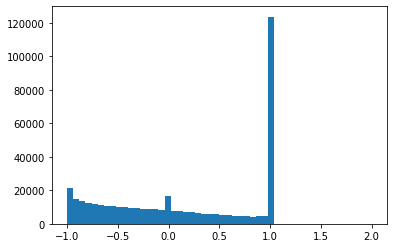

<IPython.core.display.Javascript object>

In [8]:
plt.hist(data["NUE"]["daughters"]["trk_min_cos"], bins=50, range=(-1, 2))